In [37]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchviz import make_dot, make_dot_from_trace

In [38]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

In [39]:
# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [40]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [41]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


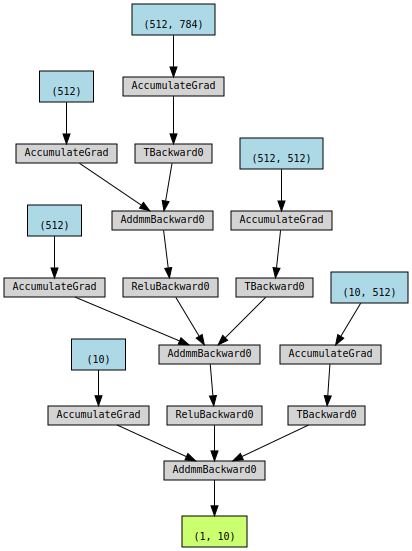

In [65]:
input = torch.rand((1,28*28))
make_dot(model(input))

In [42]:
nn.Linear(20,30)

Linear(in_features=20, out_features=30, bias=True)

In [43]:
m = nn.Linear(3,4)
dataIn = torch.randn(3)
dataOut = m(dataIn)
print(dataIn)
print(dataOut)


tensor([ 3.0119, -1.0669, -0.5547])
tensor([-0.9799, -1.1145, -0.7516, -2.0124], grad_fn=<AddBackward0>)


In [44]:
r = nn.ReLU()
dataIn = dataOut
dataOut = r(dataIn)
print(dataIn)
print(dataOut)


tensor([-0.9799, -1.1145, -0.7516, -2.0124], grad_fn=<AddBackward0>)
tensor([0., 0., 0., 0.], grad_fn=<ReluBackward0>)


In [45]:
print(m.weight)
print(m.bias)

Parameter containing:
tensor([[-0.1480,  0.0219,  0.0202],
        [-0.3619,  0.2941, -0.0763],
        [-0.3767, -0.5527,  0.1793],
        [-0.5762, -0.2748,  0.4735]], requires_grad=True)
Parameter containing:
tensor([-0.4996,  0.2469, -0.1075, -0.3075], requires_grad=True)


In [46]:
m.weight.detach().cpu().numpy()

array([[-0.14796165,  0.02194529,  0.02024909],
       [-0.36187953,  0.29411566, -0.07630409],
       [-0.37665266, -0.5527414 ,  0.17927167],
       [-0.57619524, -0.27477154,  0.4735194 ]], dtype=float32)

In [47]:
model.named_parameters()

<generator object Module.named_parameters at 0x7f9fc39ff970>

In [48]:
for a, b in model.named_parameters():
    print(a)

linear_relu_stack.0.weight
linear_relu_stack.0.bias
linear_relu_stack.2.weight
linear_relu_stack.2.bias
linear_relu_stack.4.weight
linear_relu_stack.4.bias


In [49]:
def check(a):
    print(f'grad_fn: {a.grad_fn}')
    print(f'is_leaf: {a.is_leaf}')
    print(f'grad: {a.grad}')
    print('----')


In [50]:
def forward(c, a, w, l):
    for i in range(1, l+1):
        c = w*a + c
    return c

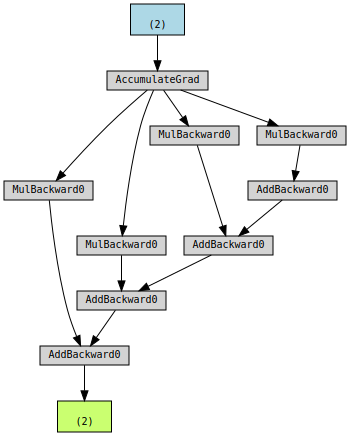

In [51]:
L = torch.tensor([0.,0.], requires_grad=True)
a = torch.tensor([1.0,2.0])
w = torch.tensor([3.0,4.0], requires_grad=True)
c = torch.tensor([0.,0.])

make_dot(forward(c, a, w, 4))

In [52]:
check(w)
# check(b)
# check(c)
# check(L)

grad_fn: None
is_leaf: True
grad: None
----


In [53]:
a = torch.tensor([1.0,2.0])
w = torch.tensor([3.0,4.0], requires_grad=True)
c = torch.tensor([0.,0.])
for i in range(1,10):
    loss = forward(c, a, w, 2)
    c = loss.detach()
    print(c)
    external_grad = torch.tensor([1.,1.])
    loss.backward(gradient=external_grad)

tensor([ 6., 16.])
tensor([12., 32.])
tensor([18., 48.])
tensor([24., 64.])
tensor([30., 80.])
tensor([36., 96.])
tensor([ 42., 112.])
tensor([ 48., 128.])
tensor([ 54., 144.])


In [54]:
check(w)

grad_fn: None
is_leaf: True
grad: tensor([18., 36.])
----
